### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [9]:
x = np.load("Xtrain_Classification1.npy")
y = np.load("ytrain_Classification1.npy")
x_project = np.load("Xtest_Classification1.npy")



In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [15]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

X_train_resampled = X_train_resampled.reshape(-1, 28, 28, 3)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

{0.0: 4280, 1.0: 4280}
{0.0: 5358, 1.0: 896}
(8560, 28, 28, 3)
(8560,)


In [26]:

# Initialize ImageDataGenerator with desired augmentation settings
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


augmented_data = []
augmented_labels = []

for i in range(X_train_resampled.shape[0]):
    img = X_train_resampled[i]
    label = y_train_resampled[i]
    img = img.reshape((1,) + img.shape)  # Reshape the image for flow method
    label = np.array([label])  # Convert label to numpy array
    for batch in datagen.flow(img, label, batch_size=1):
        augmented_data.append(batch[0][0])  # Extract augmented image
        augmented_labels.append(batch[1][0])  # Extract augmented label
        break  # Exit the loop after one iteration to avoid infinite loop

# Convert augmented data and labels to numpy arrays
augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

In [27]:
print(augmented_data.shape)
#print(augmented_data)
#print(X_train_resampled)

augmented_data=np.round(augmented_data).astype(int)
print(augmented_data)

(8560, 28, 28, 3)
[[[[231 137 155]
   [231 137 155]
   [230 137 155]
   ...
   [221 124 140]
   [221 124 141]
   [220 123 140]]

  [[230 136 154]
   [230 136 154]
   [230 136 154]
   ...
   [221 124 140]
   [220 123 140]
   [220 123 140]]

  [[227 133 151]
   [227 133 151]
   [227 134 151]
   ...
   [223 127 141]
   [221 125 141]
   [219 122 140]]

  ...

  [[225 134 149]
   [222 131 146]
   [220 129 144]
   ...
   [213 129 135]
   [212 129 134]
   [211 128 133]]

  [[225 134 149]
   [222 131 146]
   [220 129 144]
   ...
   [211 128 134]
   [211 129 135]
   [211 129 135]]

  [[225 134 149]
   [222 131 146]
   [220 129 144]
   ...
   [211 126 133]
   [211 127 133]
   [211 127 134]]]


 [[[247 174 165]
   [247 174 165]
   [247 174 165]
   ...
   [247 159 157]
   [247 162 159]
   [245 162 158]]

  [[247 174 165]
   [247 174 165]
   [247 174 165]
   ...
   [245 158 155]
   [245 161 157]
   [243 160 155]]

  [[247 174 165]
   [247 174 165]
   [247 174 165]
   ...
   [244 158 153]
   [244 16

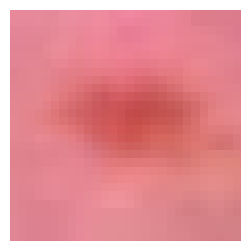

0.0


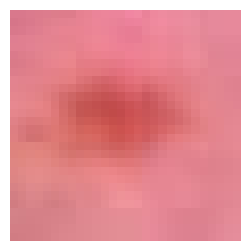

0.0


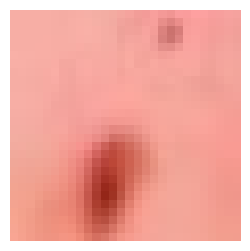

0.0


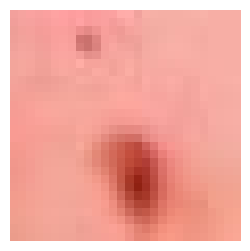

0.0


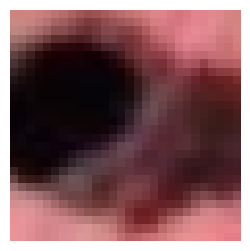

1.0


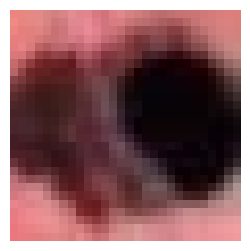

1.0


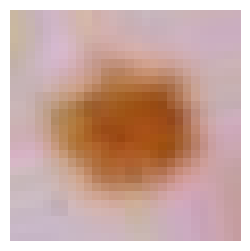

1.0


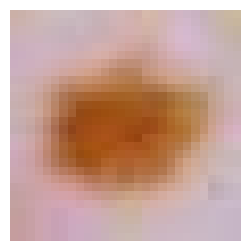

1.0


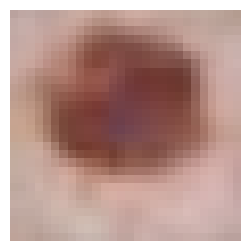

0.0


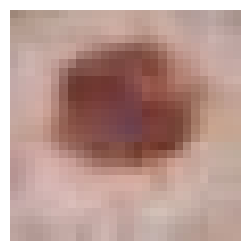

0.0


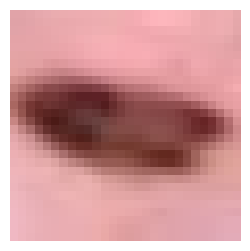

0.0


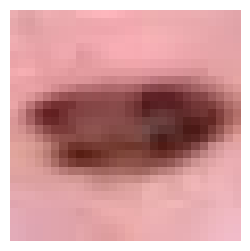

0.0


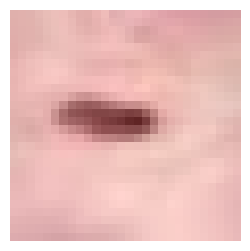

0.0


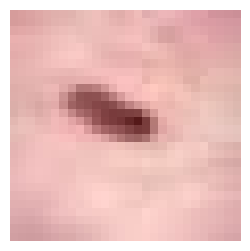

0.0


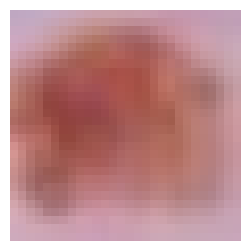

1.0


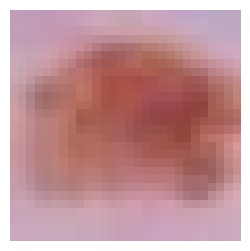

1.0


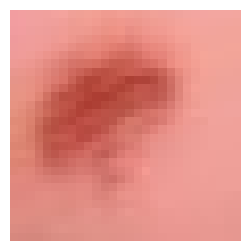

0.0


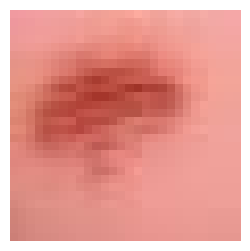

0.0


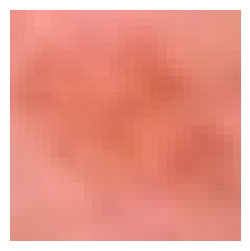

0.0


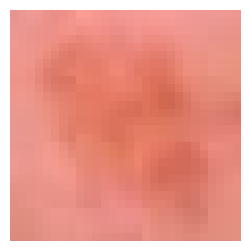

0.0


In [28]:
for i in range(10):
    color_image = np.stack([augmented_data[i][:,:,0], augmented_data[i][:,:,1], augmented_data[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
    print(augmented_labels[i])
    color_image = np.stack([X_train_resampled[i][:,:,0], X_train_resampled[i][:,:,1], X_train_resampled[i][:,:,2]], axis=-1)
    plt.figure(figsize=(3, 3))
    plt.imshow(color_image)
    plt.axis("off")
    plt.show()
    print(y_train_resampled[i])